## Bagging randomForest

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [2]:
X,y=make_moons(n_samples=500, noise=0.25, random_state=3)
#print("X",X,"\ny",y)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, 
                                                     random_state=42)

#bagging(bootstrap aggregating)
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_prd=bag_clf.predict(X_test)

y_prd

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [3]:
#그냥 decisionTree
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_y_pred=dt_clf.predict(X_test)

dt_y_pred 

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [4]:
#oob_score 적용
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)

In [5]:
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9306666666666666

In [6]:
from sklearn.metrics import accuracy_score
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.928

In [ ]:
# 배깅 분류기에 있는 결정 트리의 결정 경계 시각화

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [8]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging=BaggingClassifier(DecisionTreeClassifier(),n_estimators=5,
                         n_jobs=-1,random_state=42)
bagging.fit(Xm_train,ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [ ]:
import matplotlib.pyplot as plt
import mglearn

fig, axes=plt.subplots(2,3,figsize=(20,10))

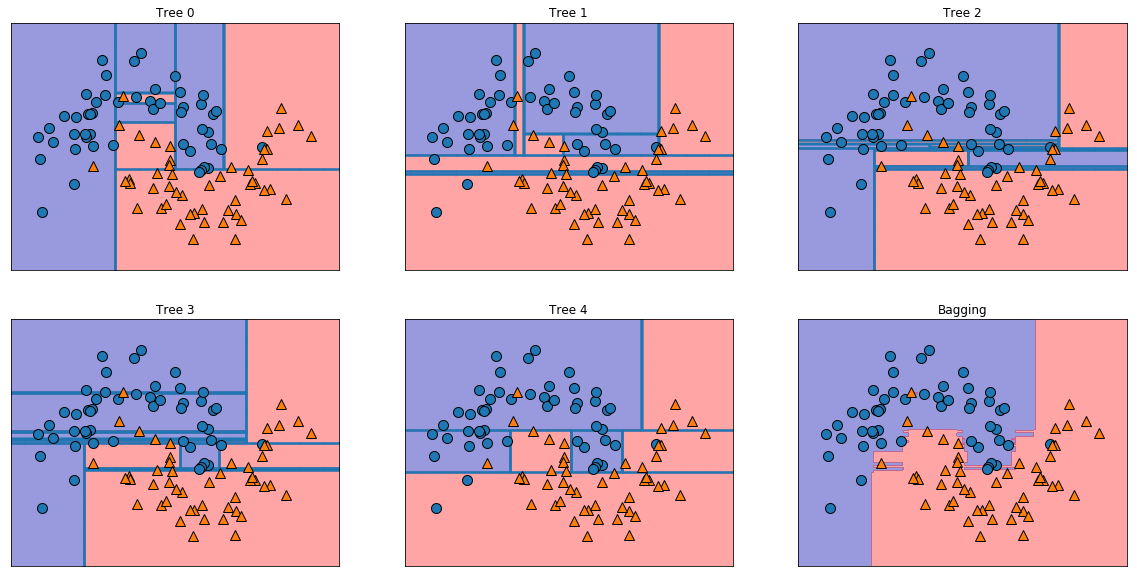

In [15]:
import matplotlib.pyplot as plt
import mglearn

fig, axes=plt.subplots(2,3,figsize=(20,10))

for i, (ax,tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1,-1], alpha=0.4)
axes[-1,-1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1],ym)
plt.show()

In [ ]:
# RandomTree 분류기에 있는 결정 트리의 결정 경계 시각화

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [ ]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=5, max_features=1,
                             random_state=2)
forest.fit(Xm_train, ym_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

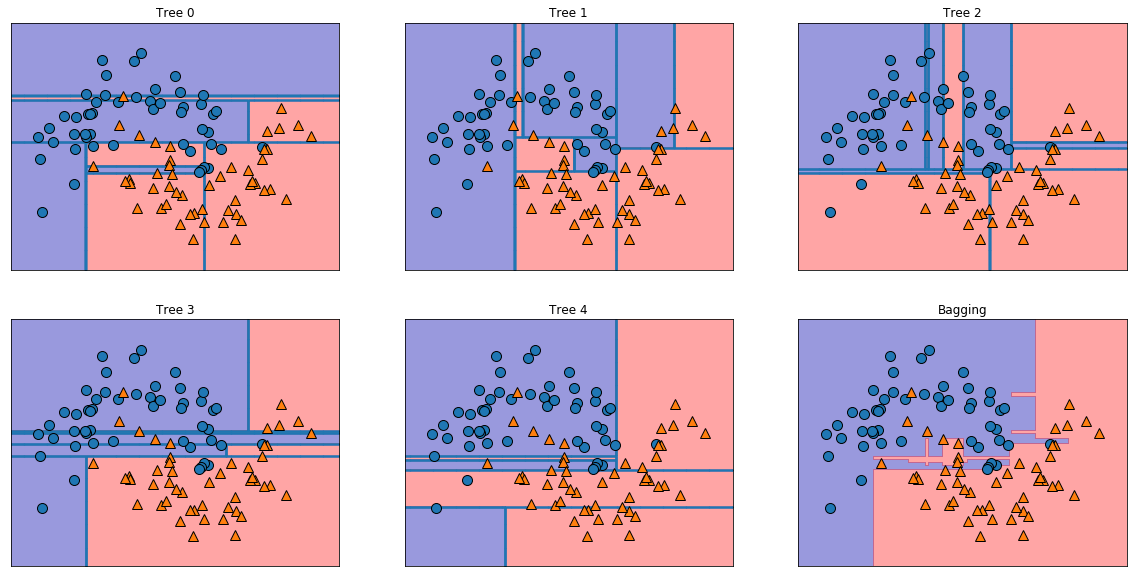

In [12]:
fig, axes=plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, Xm, fill=True, ax=axes[-1,-1], alpha=0.4)
axes[-1,-1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1],ym)
plt.show()

In [13]:
from sklearn.datasets import load_iris

iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, importance in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name,'=',importance)

sepal length (cm) = 0.11249225099876374
sepal width (cm) = 0.023119288282510326
petal length (cm) = 0.44103046436395765
petal width (cm) = 0.4233579963547681


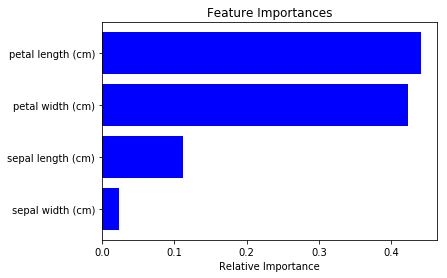

In [14]:
import numpy as np

features=iris['feature_names']
importances=rnd_clf.feature_importances_
indices=np.argsort(importances)

plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()